In [1]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20
pd.set_option('precision',2)

# 第十四章 数据分析案例

# 14.1 来自Bitly的USA.gov数据

- json数据处理

In [2]:
path = 'datasets/bitly_usagov/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
open(path).readlines()

['{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n',
 '{ "a": "GoogleMaps\\/RochesterNY", "c": "US", "nk": 0, "tz": "America\\/Denver", "gr": "UT", "g": "mwszkS", "h": "mwszkS", "l": "bitly", "hh": "j.mp", "r": "http:\\/\\/www.AwareMap.com\\/", "u": "http:\\/\\/www.monroecounty.gov\\/etc\\/911\\/rss.php", "t": 1331923249, "hc": 1308262393, "cy": "Provo", "ll": [ 40.218102, -111.613297 ] }\n',
 '{ "a": "Mozilla\\/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident\\/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media

In [5]:
import json
records = [json.loads(line) for line in open(path)]

In [6]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [7]:
records = [json.loads(line) for line in open(path).readlines()]
records

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'al': 'en-US,en;q=0.8',
  'c': 'US',
  'cy': 'Danvers',
  'g': 'A6qOVH',
  'gr': 'MA',
  'h': 'wfLQtf',
  'hc': 1331822918,
  'hh': '1.usa.gov',
  'l': 'orofrog',
  'll': [42.576698, -70.954903],
  'nk': 1,
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  't': 1331923247,
  'tz': 'America/New_York',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'cy': 'Provo',
  'g': 'mwszkS',
  'gr': 'UT',
  'h': 'mwszkS',
  'hc': 1308262393,
  'hh': 'j.mp',
  'l': 'bitly',
  'll': [40.218102, -111.613297],
  'nk': 0,
  'r': 'http://www.AwareMap.com/',
  't': 1331923249,
  'tz': 'America/Denver',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php'},
 {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0

## 用纯Python代码对时区进行计数
- 统计最常出现的时区

In [12]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

- 计数的方案一（我的）

In [13]:
def get_counts(sequece):
    counts = {}
    for x in set(sequece):
        counts[x] = list(sequece).count(x)
    return counts

In [14]:
# 测试
count = get_counts(time_zones)
count

{'': 521,
 'Africa/Cairo': 3,
 'Africa/Casablanca': 1,
 'Africa/Ceuta': 2,
 'Africa/Johannesburg': 1,
 'Africa/Lusaka': 1,
 'America/Anchorage': 5,
 'America/Argentina/Buenos_Aires': 1,
 'America/Argentina/Cordoba': 1,
 'America/Argentina/Mendoza': 1,
 'America/Bogota': 3,
 'America/Caracas': 1,
 'America/Chicago': 400,
 'America/Chihuahua': 2,
 'America/Costa_Rica': 1,
 'America/Denver': 191,
 'America/Edmonton': 6,
 'America/Guayaquil': 2,
 'America/Halifax': 4,
 'America/Indianapolis': 20,
 'America/La_Paz': 1,
 'America/Lima': 1,
 'America/Los_Angeles': 382,
 'America/Managua': 3,
 'America/Mazatlan': 1,
 'America/Mexico_City': 15,
 'America/Monterrey': 1,
 'America/Montevideo': 1,
 'America/Montreal': 9,
 'America/New_York': 1251,
 'America/Phoenix': 20,
 'America/Puerto_Rico': 10,
 'America/Rainy_River': 25,
 'America/Recife': 2,
 'America/Santo_Domingo': 1,
 'America/Sao_Paulo': 33,
 'America/St_Kitts': 1,
 'America/Tegucigalpa': 1,
 'America/Vancouver': 12,
 'America/Winnipeg':

In [15]:
# 可以尝试字典推导
{x:list(time_zones).count(x) for x in set(time_zones)}

{'': 521,
 'Africa/Cairo': 3,
 'Africa/Casablanca': 1,
 'Africa/Ceuta': 2,
 'Africa/Johannesburg': 1,
 'Africa/Lusaka': 1,
 'America/Anchorage': 5,
 'America/Argentina/Buenos_Aires': 1,
 'America/Argentina/Cordoba': 1,
 'America/Argentina/Mendoza': 1,
 'America/Bogota': 3,
 'America/Caracas': 1,
 'America/Chicago': 400,
 'America/Chihuahua': 2,
 'America/Costa_Rica': 1,
 'America/Denver': 191,
 'America/Edmonton': 6,
 'America/Guayaquil': 2,
 'America/Halifax': 4,
 'America/Indianapolis': 20,
 'America/La_Paz': 1,
 'America/Lima': 1,
 'America/Los_Angeles': 382,
 'America/Managua': 3,
 'America/Mazatlan': 1,
 'America/Mexico_City': 15,
 'America/Monterrey': 1,
 'America/Montevideo': 1,
 'America/Montreal': 9,
 'America/New_York': 1251,
 'America/Phoenix': 20,
 'America/Puerto_Rico': 10,
 'America/Rainy_River': 25,
 'America/Recife': 2,
 'America/Santo_Domingo': 1,
 'America/Sao_Paulo': 33,
 'America/St_Kitts': 1,
 'America/Tegucigalpa': 1,
 'America/Vancouver': 12,
 'America/Winnipeg':

In [17]:
count['America/New_York']

1251

In [18]:
len(time_zones)

3440

- 计数的方案-书上的
- 使用collectios模块的defaultdict

In [20]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts
counts = get_counts2(time_zones)
counts

defaultdict(int,
            {'': 521,
             'Africa/Cairo': 3,
             'Africa/Casablanca': 1,
             'Africa/Ceuta': 2,
             'Africa/Johannesburg': 1,
             'Africa/Lusaka': 1,
             'America/Anchorage': 5,
             'America/Argentina/Buenos_Aires': 1,
             'America/Argentina/Cordoba': 1,
             'America/Argentina/Mendoza': 1,
             'America/Bogota': 3,
             'America/Caracas': 1,
             'America/Chicago': 400,
             'America/Chihuahua': 2,
             'America/Costa_Rica': 1,
             'America/Denver': 191,
             'America/Edmonton': 6,
             'America/Guayaquil': 2,
             'America/Halifax': 4,
             'America/Indianapolis': 20,
             'America/La_Paz': 1,
             'America/Lima': 1,
             'America/Los_Angeles': 382,
             'America/Managua': 3,
             'America/Mazatlan': 1,
             'America/Mexico_City': 15,
             'America/Monte

- 提取top10时区及计数信息

In [21]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [22]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

- 使用collections.Counter类

In [26]:
from collections import Counter
counts = Counter(time_zones)
dir(counts)

['__add__',
 '__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__init__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__missing__',
 '__module__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_keep_positive',
 'clear',
 'copy',
 'elements',
 'fromkeys',
 'get',
 'items',
 'keys',
 'most_common',
 'pop',
 'popitem',
 'setdefault',
 'subtract',
 'update',
 'values']

In [29]:
counts.items()

dict_items([('', 521), ('Europe/Budapest', 5), ('Europe/Copenhagen', 5), ('America/Montevideo', 1), ('Europe/Warsaw', 16), ('America/Winnipeg', 4), ('Asia/Tokyo', 37), ('Australia/NSW', 6), ('Europe/London', 74), ('America/Halifax', 4), ('Europe/Amsterdam', 22), ('Africa/Ceuta', 2), ('Europe/Moscow', 10), ('America/Los_Angeles', 382), ('Europe/Bucharest', 4), ('Australia/Queensland', 1), ('America/Montreal', 9), ('America/Monterrey', 1), ('America/Costa_Rica', 1), ('Chile/Continental', 6), ('Asia/Jerusalem', 3), ('America/Phoenix', 20), ('Europe/Athens', 6), ('Pacific/Honolulu', 36), ('Europe/Brussels', 4), ('America/Argentina/Cordoba', 1), ('America/Edmonton', 6), ('Asia/Yekaterinburg', 1), ('America/La_Paz', 1), ('Europe/Lisbon', 8), ('Asia/Amman', 2), ('Europe/Uzhgorod', 1), ('Africa/Casablanca', 1), ('Europe/Belgrade', 2), ('Europe/Skopje', 1), ('America/Argentina/Buenos_Aires', 1), ('Asia/Calcutta', 9), ('America/Puerto_Rico', 10), ('America/Argentina/Mendoza', 1), ('Asia/Beirut',

In [30]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

##  用pandas对时区进行计数

In [33]:
import pandas as pd
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [34]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [36]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

- 可视化准备，处理缺失值

In [39]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz==''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

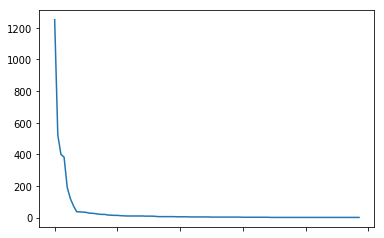

In [42]:
import matplotlib.pyplot as plt
tz_counts.plot()
plt.show()

In [43]:
dir(tz_counts)

['Missing',
 'T',
 'Unknown',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',

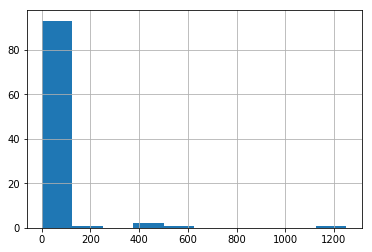

In [46]:
tz_counts.hist()

- seaborn包创建水平柱状图

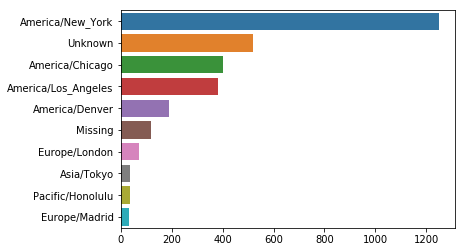

In [47]:
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index,x=subset.values)

- a字段分析，有的字段非常长

In [54]:
frame['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

- "agent"字符清洗，分离出更清洗的标识性字段,得到一份用户行为摘要

In [56]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [57]:
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

- 按Windows和非Windows用户对时区统计信息进行分解。为了简
单起见，我们假定只要agent字符串中含有"Windows"就认为该用户为Windows
用户。由于有的agent缺失，所以首先将它们从数据中移除：

In [59]:
cframe = frame[frame.a.notnull()]
cframe[:5]

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


- 筛选是否含有字符windows

In [71]:
import numpy as np
cframe['os'] = np.where(cframe.a.str.contains('Windows'),'Windows','not Windows')
cframe['os'][:5]

d:\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0        Windows
1    not Windows
2        Windows
3    not Windows
4        Windows
Name: os, dtype: object

- 按照操作系统和时区进行分组

In [72]:
by_os_tz = cframe.groupby(['tz','os'])

In [88]:
agg_counts = by_os_tz.size().unstack().fillna(0)
agg_counts[:10]

os,Windows,not Windows
tz,,
,276.0,245.0
Africa/Cairo,3.0,0.0
Africa/Casablanca,1.0,0.0
Africa/Ceuta,2.0,0.0
Africa/Johannesburg,1.0,0.0
Africa/Lusaka,1.0,0.0
America/Anchorage,1.0,4.0
America/Argentina/Buenos_Aires,0.0,1.0
America/Argentina/Cordoba,1.0,0.0


- 选取最常出现的时区

In [93]:
agg_counts.sum(1) [:10]

tz
                                  521.0
Africa/Cairo                        3.0
Africa/Casablanca                   1.0
Africa/Ceuta                        2.0
Africa/Johannesburg                 1.0
Africa/Lusaka                       1.0
America/Anchorage                   5.0
America/Argentina/Buenos_Aires      1.0
America/Argentina/Cordoba           1.0
America/Argentina/Mendoza           1.0
dtype: float64

- argsort函数返回的是数组值从小到大的索引值

In [91]:
indexer = agg_counts.sum(1) .argsort()
indexer[:10]
# 据agg_counts中的行数构造了一个间接索引数组

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

- 通过take按照这个顺序截取了最后10行最大值

In [108]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Windows,not Windows
tz,,
America/Sao_Paulo,20.0,13.0
Europe/Madrid,19.0,16.0
Pacific/Honolulu,36.0,0.0
Asia/Tokyo,35.0,2.0
Europe/London,31.0,43.0
America/Denver,59.0,132.0
America/Los_Angeles,252.0,130.0
America/Chicago,285.0,115.0
,276.0,245.0


- pandas简单方法nlargest()

In [95]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [111]:
# Rearrange the data for plotting
count_subset1 = count_subset.stack()
count_subset1.name = 'total'
count_subset1 = count_subset1.reset_index()
count_subset1[:10]

,tz,os,total
0,America/Sao_Paulo,Windows,20.0
1,America/Sao_Paulo,not Windows,13.0
2,Europe/Madrid,Windows,19.0
3,Europe/Madrid,not Windows,16.0
4,Pacific/Honolulu,Windows,36.0
5,Pacific/Honolulu,not Windows,0.0
6,Asia/Tokyo,Windows,35.0
7,Asia/Tokyo,not Windows,2.0
8,Europe/London,Windows,31.0
9,Europe/London,not Windows,43.0


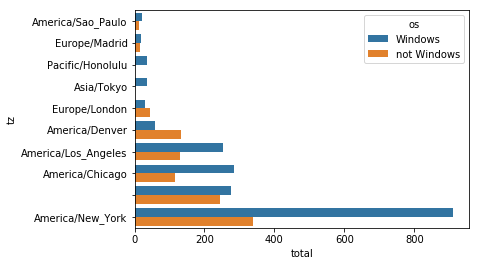

In [112]:
sns.barplot(x='total',y='tz',hue='os', data=count_subset1)

- 这张图不容易看出Windows用户在小分组中的相对比例，因此标准化分组百分比
之和为1：

In [124]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset1.groupby('tz').apply(norm_total)
results

,tz,os,total,normed_total
0,America/Sao_Paulo,Windows,20.0,0.606061
1,America/Sao_Paulo,not Windows,13.0,0.393939
2,Europe/Madrid,Windows,19.0,0.542857
3,Europe/Madrid,not Windows,16.0,0.457143
4,Pacific/Honolulu,Windows,36.0,1.000000
5,Pacific/Honolulu,not Windows,0.0,0.000000
6,Asia/Tokyo,Windows,35.0,0.945946
7,Asia/Tokyo,not Windows,2.0,0.054054
8,Europe/London,Windows,31.0,0.418919
9,Europe/London,not Windows,43.0,0.581081


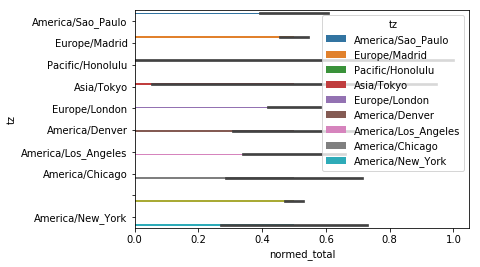

In [130]:
sns.barplot(x='normed_total',y='tz',hue='tz',data=results)

In [139]:
g = count_subset1.groupby('tz')
results2 =count_subset1.total / g.total.transform("sum")
results2

0     0.606061
1     0.393939
2     0.542857
3     0.457143
4     1.000000
5     0.000000
6     0.945946
7     0.054054
8     0.418919
9     0.581081
10    0.308901
11    0.691099
12    0.659686
13    0.340314
14    0.712500
15    0.287500
16    0.529750
17    0.470250
18    0.729017
19    0.270983
Name: total, dtype: float64

## 电影评论处理

In [2]:
# 设置pd显示数量
pd.options.display.max_rows = 10
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::',
                      header=None, names=unames)

d:\python35\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


- 为了避免上面的warning，增加了engine='python'选项设置

In [6]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::',
                        header=None, names=rnames,engine='python')
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames,engine='python')

In [8]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [10]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


- merge三个表

In [12]:
data = pd.merge(pd.merge(ratings,users),movies)
data[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [13]:
data1 = pd.merge(pd.merge(users,ratings),movies)
data1[:5]

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


- 按性别计算电影平均得分：pivot_table

In [16]:
# mine
mean_ratings = data.pivot_table('rating',index=['movie_id','title'],columns='gender')
mean_ratings[:5]

,gender,F,M
movie_id,title,,
1,Toy Story (1995),4.19,4.13
2,Jumanji (1995),3.28,3.18
3,Grumpier Old Men (1995),3.07,2.99
4,Waiting to Exhale (1995),2.98,2.48
5,Father of the Bride Part II (1995),3.21,2.89


In [17]:
# the book's
mean_ratings = data.pivot_table('rating',index=['title'],columns='gender')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.38,2.76
'Night Mother (1986),3.39,3.35
'Til There Was You (1997),2.68,2.73
"'burbs, The (1989)",2.79,2.96
...And Justice for All (1979),3.83,3.69


- 过滤掉评分数据不够250条的电影：分组size

In [20]:
rating_by_title = data.groupby(['movie_id','title']).size()
rating_by_title[:5]

movie_id  title                             
1         Toy Story (1995)                      2077
2         Jumanji (1995)                         701
3         Grumpier Old Men (1995)                478
4         Waiting to Exhale (1995)               170
5         Father of the Bride Part II (1995)     296
dtype: int64

In [24]:
rating_by_title = data.groupby(['title']).size()
rating_by_title[:5]
active_titles = rating_by_title[rating_by_title >= 250]
active_titles[:5]

title
'burbs, The (1989)                   303
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

- 标题索引中含有评分数据大于250条的电影名称，然后我们就可以据此从前面的
mean_ratings中选取所需的行了：

In [26]:
active_mean_ratings = mean_ratings.loc[active_titles.index]
active_mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.79,2.96
10 Things I Hate About You (1999),3.65,3.31
101 Dalmatians (1961),3.79,3.50
101 Dalmatians (1996),3.24,2.91
12 Angry Men (1957),4.18,4.33
...,...,...
Young Guns (1988),3.37,3.43
Young Guns II (1990),2.93,2.90
Young Sherlock Holmes (1985),3.51,3.36


- 女性观众最喜欢的电影，对F列降序排列

In [27]:
top_female_ratings = active_mean_ratings.F.sort_values(ascending=False)
top_female_ratings

title
Close Shave, A (1995)                                     4.64
Wrong Trousers, The (1993)                                4.59
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)             4.57
Wallace & Gromit: The Best of Aardman Animation (1996)    4.56
Schindler's List (1993)                                   4.56
                                                          ... 
Avengers, The (1998)                                      1.92
Speed 2: Cruise Control (1997)                            1.91
Rocky V (1990)                                            1.88
Barb Wire (1996)                                          1.59
Battlefield Earth (2000)                                  1.57
Name: F, Length: 1216, dtype: float64

- 对比下上述两种排序结果，

In [28]:
top_female_ratings = active_mean_ratings.sort_values(by='F',ascending=False)
top_female_ratings

gender,F,M
title,,
"Close Shave, A (1995)",4.64,4.47
"Wrong Trousers, The (1993)",4.59,4.48
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.57,4.46
Wallace & Gromit: The Best of Aardman Animation (1996),4.56,4.39
Schindler's List (1993),4.56,4.49
...,...,...
"Avengers, The (1998)",1.92,2.02
Speed 2: Cruise Control (1997),1.91,1.86
Rocky V (1990),1.88,2.13


## 计算评分分歧

- 男女评分相减

In [30]:
# 分歧最大且女性观众更喜欢的电影
active_mean_ratings['diff'] = active_mean_ratings['M'] - active_mean_ratings['F']
active_mean_ratings.sort_values(by='diff')

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.79,2.96,-0.83
Jumpin' Jack Flash (1986),3.25,2.58,-0.68
Grease (1978),3.98,3.37,-0.61
Little Women (1994),3.87,3.32,-0.55
Steel Magnolias (1989),3.90,3.37,-0.54
...,...,...,...
"Cable Guy, The (1996)",2.25,2.86,0.61
"Longest Day, The (1962)",3.41,4.03,0.62
Dumb & Dumber (1994),2.70,3.34,0.64


- 对排序结果反序并取出前10行，得到的则是男性观众更喜欢的电影：

In [33]:
sorted_by_diff = active_mean_ratings.sort_values(by='diff')
sorted_by_diff.iloc[-10:,:]

gender,F,M,diff
title,,,
For a Few Dollars More (1965),3.41,3.95,0.54
Caddyshack (1980),3.40,3.97,0.57
Rocky III (1982),2.36,2.94,0.58
"Hidden, The (1987)",3.14,3.75,0.61
Evil Dead II (Dead By Dawn) (1987),3.30,3.91,0.61
"Cable Guy, The (1996)",2.25,2.86,0.61
"Longest Day, The (1962)",3.41,4.03,0.62
Dumb & Dumber (1994),2.70,3.34,0.64
"Kentucky Fried Movie, The (1977)",2.88,3.56,0.68


In [37]:
# 书上的方法
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.49,4.22,0.73
"Kentucky Fried Movie, The (1977)",2.88,3.56,0.68
Dumb & Dumber (1994),2.70,3.34,0.64
"Longest Day, The (1962)",3.41,4.03,0.62
"Cable Guy, The (1996)",2.25,2.86,0.61
Evil Dead II (Dead By Dawn) (1987),3.30,3.91,0.61
"Hidden, The (1987)",3.14,3.75,0.61
Rocky III (1982),2.36,2.94,0.58
Caddyshack (1980),3.40,3.97,0.57


In [39]:
sorted_by_diff[-10:]

gender,F,M,diff
title,,,
For a Few Dollars More (1965),3.41,3.95,0.54
Caddyshack (1980),3.40,3.97,0.57
Rocky III (1982),2.36,2.94,0.58
"Hidden, The (1987)",3.14,3.75,0.61
Evil Dead II (Dead By Dawn) (1987),3.30,3.91,0.61
"Cable Guy, The (1996)",2.25,2.86,0.61
"Longest Day, The (1962)",3.41,4.03,0.62
Dumb & Dumber (1994),2.70,3.34,0.64
"Kentucky Fried Movie, The (1977)",2.88,3.56,0.68


- 如果只是想要找出分歧最大的电影（不考虑性别因素），则可以计算得分数据的方
差或标准差：

In [41]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles.index]
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.32
Blair Witch Project, The (1999)          1.32
Natural Born Killers (1994)              1.31
Tank Girl (1995)                         1.28
Rocky Horror Picture Show, The (1975)    1.26
Eyes Wide Shut (1999)                    1.26
Evita (1996)                             1.25
Billy Madison (1995)                     1.25
Fear and Loathing in Las Vegas (1998)    1.25
Bicentennial Man (1999)                  1.25
Name: rating, dtype: float64

# 14.3 1880-2010年间全美婴儿姓名

In [48]:
!more -n 10 datasets/babynames/yob1880.txt

无效参数 - /babynames


In [49]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


- 合并所有文件，

In [68]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

这里需要注意几件事情。
- 第一，concat默认是按行将多个DataFrame组合到一起的；
- 第二，必须指定ignore_index=True，因为我们不希望保留read_csv所返回的
原始行号。

In [51]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [53]:
total_births = names.pivot_table('births',index='year',columns='sex',aggfunc=sum)
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


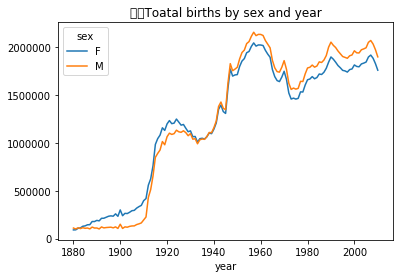

In [55]:
total_births.plot(title='示例Toatal births by sex and year')

- 下面我们来插入一个prop列，用于存放指定名字的婴儿数相对于总出生数的比
例。
- 计算婴儿名字重复率

In [56]:
def add_prop(group):
    group['prop'] = group.births/ group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,7.76e-02
1,Anna,F,2604,1880,2.86e-02
2,Emma,F,2003,1880,2.20e-02
3,Elizabeth,F,1939,1880,2.13e-02
4,Minnie,F,1746,1880,1.92e-02
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,2.63e-06
1690780,Zyonne,M,5,2010,2.63e-06
1690781,Zyquarius,M,5,2010,2.63e-06
1690782,Zyran,M,5,2010,2.63e-06


In [58]:
help(names.transform)

Help on method transform in module pandas.core.generic:

transform(func, *args, **kwargs) method of pandas.core.frame.DataFrame instance
    Call function producing a like-indexed NDFrame
    and return a NDFrame with the transformed values
    
    .. versionadded:: 0.20.0
    
    Parameters
    ----------
    func : callable, string, dictionary, or list of string/callables
        To apply to column
    
        Accepted Combinations are:
    
        - string function name
        - function
        - list of functions
        - dict of column names -> functions (or list of functions)
    
    Returns
    -------
    transformed : NDFrame
    
    Examples
    --------
    >>> df = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'],
    ...                   index=pd.date_range('1/1/2000', periods=10))
    df.iloc[3:7] = np.nan
    
    >>> df.transform(lambda x: (x - x.mean()) / x.std())
                       A         B         C
    2000-01-01  0.579457  1.236184  0.1

In [73]:
grouped = names.groupby(['year','sex'])
names['prop'] = names.births / grouped.births.transform(sum)

In [74]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,7.76e-02
1,Anna,F,2604,1880,2.86e-02
2,Emma,F,2003,1880,2.20e-02
3,Elizabeth,F,1939,1880,2.13e-02
4,Minnie,F,1746,1880,1.92e-02
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,2.63e-06
1690780,Zyonne,M,5,2010,2.63e-06
1690781,Zyquarius,M,5,2010,2.63e-06
1690782,Zyran,M,5,2010,2.63e-06


In [76]:
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

- 取出该数据的一个子集：每对
sex/year组合的前1000个名字。这又是一个分组操作：

In [77]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [78]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,7.76e-02
1,Anna,F,2604,1880,2.86e-02
2,Emma,F,2003,1880,2.20e-02
3,Elizabeth,F,1939,1880,2.13e-02
4,Minnie,F,1746,1880,1.92e-02
...,...,...,...,...,...
261872,Camilo,M,194,2010,1.02e-04
261873,Destin,M,194,2010,1.02e-04
261874,Jaquan,M,194,2010,1.02e-04
261875,Jaydan,M,194,2010,1.02e-04


### 分析命名趋势

In [79]:
# 拆分成男、女两个表
boys = top1000[top1000.sex=='M']
girls = top1000[top1000.sex == 'F']
boys

,name,sex,births,year,prop
942,John,M,9655,1880,8.74e-02
943,William,M,9533,1880,8.63e-02
944,James,M,5927,1880,5.36e-02
945,Charles,M,5348,1880,4.84e-02
946,George,M,5126,1880,4.64e-02
...,...,...,...,...,...
261872,Camilo,M,194,2010,1.02e-04
261873,Destin,M,194,2010,1.02e-04
261874,Jaquan,M,194,2010,1.02e-04
261875,Jaydan,M,194,2010,1.02e-04


In [80]:
girls

,name,sex,births,year,prop
0,Mary,F,7065,1880,7.76e-02
1,Anna,F,2604,1880,2.86e-02
2,Emma,F,2003,1880,2.20e-02
3,Elizabeth,F,1939,1880,2.13e-02
4,Minnie,F,1746,1880,1.92e-02
...,...,...,...,...,...
260872,Violeta,F,250,2010,1.42e-04
260873,Leilah,F,250,2010,1.42e-04
260874,Alaysia,F,250,2010,1.42e-04
260875,Dania,F,249,2010,1.42e-04


In [81]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

In [82]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


- 6868个名字，取几个名词画图

In [83]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000403D8438>,
      dtype=object)

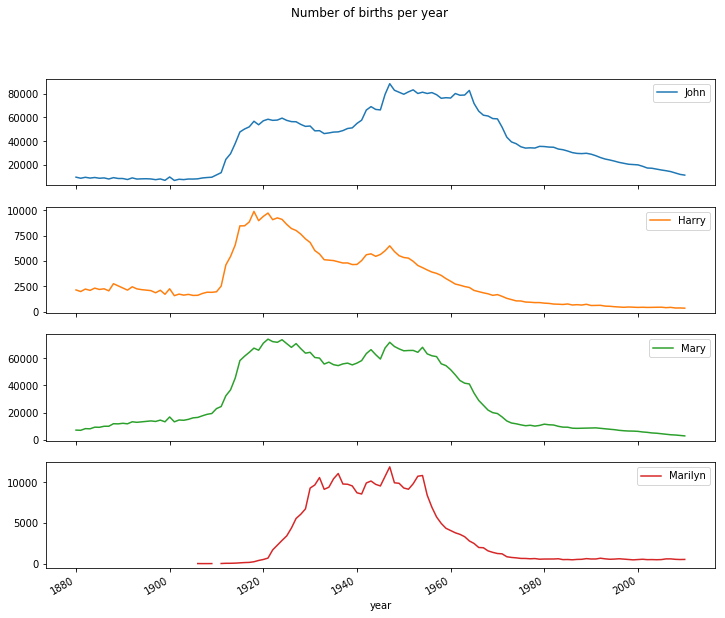

In [84]:
subset.plot(subplots=True,figsize=(12,10),grid=False,title="Number of births per year")

### 评估命名多样性的增长

- 书：根据上图，这几个名字似乎使用率降低了。实际情况如何，作者进一步分析
- 计算最流行1000个名字所占的比例，从而判断父母给小孩起常见名的情况是否越来越少

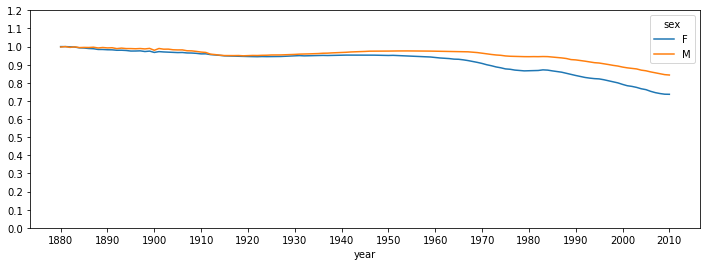

In [92]:
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)
table.plot(figsize=(12,4),yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

# table.plot(yticks=np.linspace(0, 1.2, 13))

In [95]:
names.groupby('year').name.unique()

year
1880    [Mary, Anna, Emma, Elizabeth, Minnie, Margaret...
1881    [Mary, Anna, Emma, Elizabeth, Margaret, Minnie...
1882    [Mary, Anna, Emma, Elizabeth, Minnie, Margaret...
1883    [Mary, Anna, Emma, Elizabeth, Minnie, Margaret...
1884    [Mary, Anna, Emma, Elizabeth, Minnie, Margaret...
                              ...                        
2006    [Emily, Emma, Madison, Isabella, Ava, Abigail,...
2007    [Emily, Isabella, Emma, Ava, Madison, Sophia, ...
2008    [Emma, Isabella, Emily, Olivia, Ava, Madison, ...
2009    [Isabella, Emma, Olivia, Sophia, Ava, Emily, M...
2010    [Isabella, Sophia, Emma, Olivia, Ava, Emily, A...
Name: name, Length: 131, dtype: object

In [99]:
dir(names.groupby('year').name.unique())

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',

In [104]:
dir(names.groupby('year').name.unique().values)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '_

In [111]:
for a in names.groupby('year').name.unique().values:
    print(len(a))

1889
1830
2012
1962
2158
2139
2225
2215
2454
2390
2475
2454
2686
2622
2705
2799
2839
2763
2988
2777
3397
2901
3065
3096
3252
3332
3307
3592
3640
3836
4173
4395
5725
6261
7160
8415
8692
8879
9307
9302
9634
9728
9660
9546
9725
9516
9335
9270
9051
8705
8710
8289
8341
8012
8189
8078
7904
7962
8050
7942
7982
8082
8384
8383
8162
8087
8679
9297
9192
9223
9271
9420
9577
9745
9859
9993
10220
10384
10376
10599
10748
10996
10975
11095
11202
10837
11021
11238
11731
12465
13396
13820
14008
14262
14733
15357
15837
16534
16610
17318
17700
17725
17895
17650
17727
18237
18767
19454
20406
21608
22670
23073
23344
23742
23838
23956
24296
24874
25705
26331
27503
27963
28264
28867
29473
30116
31585
32354
32455
32153
31432


In [116]:
dir(names.groupby('year').name)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_accessors',
 '_add_numeric_operations',
 '_agg_doc',
 '_aggregate',
 '_aggregate_multiple_funcs',
 '_aggregate_named',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_bool_agg',
 '_builtin_table',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_def_str',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_fill',
 '_get_cythonized_result',
 '_get_index',
 '_get_indices',
 '_gotitem',
 '_group_selection',
 '_internal_names',
 '_inter

- 能够算出每一年的用命数量，从而看成姓名特征逐渐疏散的趋势

In [119]:
names.groupby('year').name.nunique()

year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2006    31585
2007    32354
2008    32455
2009    32153
2010    31432
Name: name, Length: 131, dtype: int64

In [144]:
diversity = names.groupby(['year','sex']).name.nunique()

In [145]:
diversity = diversity.unstack()

In [146]:
diversity

sex,F,M
year,,
1880,942,1058
1881,938,997
1882,1028,1099
1883,1054,1030
1884,1172,1125
...,...,...
2006,20028,14011
2007,20520,14363
2008,20416,14590


In [150]:
help(diversity.plot)

Help on FramePlotMethods in module pandas.plotting._core object:

class FramePlotMethods(BasePlotMethods)
 |  DataFrame plotting accessor and method
 |  
 |  Examples
 |  --------
 |  >>> df.plot.line()
 |  >>> df.plot.scatter('x', 'y')
 |  >>> df.plot.hexbin()
 |  
 |  These plotting methods can also be accessed by calling the accessor as a
 |  method with the ``kind`` argument:
 |  ``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
 |  
 |  Method resolution order:
 |      FramePlotMethods
 |      BasePlotMethods
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      pandas.core.accessor.DirNamesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, font

## 14.4 USDA食品数据库